#### 4.1.1

---
What does `FIND-MAXIMUM-SUBARRAY` return when all elements of `A` are negative?

Ans: The algorithm created in `algorithms/chapter4/find_max_subarray.py` tries to find the subarray with greater sum, but all numbers are negative. I've defined the `max_value = -1` initially, therefore, none of the subarrays could have a greater sum than the initial value.

#### 4.1.2

---

Write pseudocode for the brute-force method of solving the maximum-subarray
problem. Your procedure should run in $\Theta(n^2)$ time.

Ans: The iterative form of this algorithm is in the file `algorithms/chapter4/find_max_subarray.py` written in python.

Complexity Analysis:

---
```python
def find_max_subarray_iterative(A: list) -> tuple[int, int, int | float]:
    max_value = -float("inf")                                           # \Theta(1)
    max_index_left = max_index_right = -1                               # \Theta(1)
    sum_value = 0                                                       # \Theta(1)

    for i in range(len(A)):                                             # \Theta(n)
        sum_value = A[i]                                                # \Theta(n)

        if sum_value >= max_value:                                      # \Theta(n)
            max_value = sum_value                                       # O(n)
            max_index_left = max_index_right = i                        # O(n)

        for j in range(i, len(A)):                                      # \Theta(n^2)
            if i == j:                                                  # \Theta(n^2)
                continue                                                # O(n^2)

            sum_value += A[j]                                           # \Theta(n^2)
            if sum_value >= max_value:                                  # O(n^2)
                max_value = sum_value
                max_index_left = i                                      # O(n^2)
                max_index_right = j                                     # O(n^2)

    return (max_index_left, max_index_right, max_value)
```
---

The resultant recurrence equation for this algorithm is:

$$
T(n) = \Theta(1) + \Theta(n) + O(n) + \Theta(n^2) + O(n^2)\\
T(n) = \Theta(n^2)
$$


#### 4.1.3

---

Implement both the brute-force and recursive algorithms for the maximum-
subarray problem on your own computer. What problem size $n_0$ gives the crossover
point at which the recursive algorithm beats the brute-force algorithm? Then,
change the base case of the recursive algorithm to use the brute-force algorithm
whenever the problem size is less than $n_0$. Does that change the crossover point?

Both algorithms are implemented in `algorithms/chapter4/find_max_subarray.py`.

Lets call the time for brute-force algorithm $T_{bf}(n)$, and the time for the recursive one,
$T_r(n)$.

A comparison was made for $T_{bf}(n)$ and $T_r(n)$, for arrays of size {1, 2, 3, ..., n}. And a plot
is shown below.

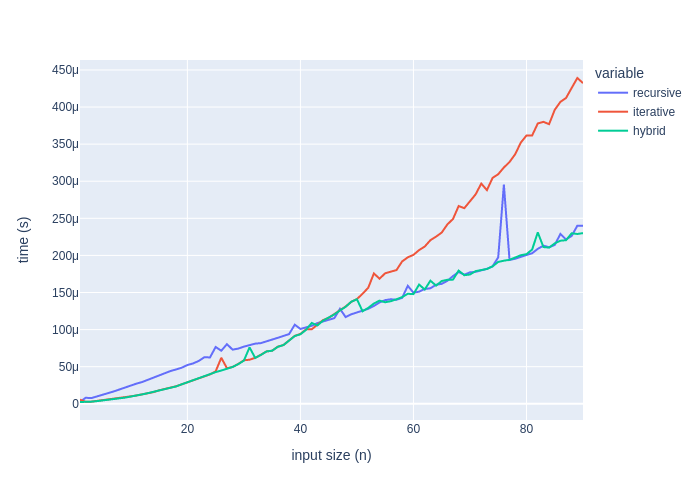

In [1]:
from algorithms.chapter4.compare_algorithms import plot_comparison


fig = plot_comparison(90)
fig.show("png")

As it is being shown in the figure above, after the array reaches a size near to 50, all the execution times
for the iterative version get bigger than for the recursive version. This is explained by the difference of
time complexities: $T_{bf}(n) = \Theta(n^2)$ and $T_{r}(n) = \Theta(n\lg n)$.

The green line represents the hybrid algorithm, that combine both iterative and recursive approaches. In the hybrid algorithm, if the input size is $\leq$ 50, then it's used the iterative algorithm, and for inputs $\gt$ 50, the recursive approach is used.

As the charts is showing, there is no difference of crossover point, it continues being after $\sim$ 50.

#### 4.1.4

---

Suppose we change the definition of the maximum-subarray problem to allow the result to be an empty subarray, where the sum of the values of an empty subarray is 0. How would you change any of the algorithms that do not allow empty subarrays to permit an empty subarray to be the result?

Ans:

As I implemented in `algorithms/chapter4/find_max_subarray.py`, on the hybrid function, there is a validation that verifies if the the input array is an empty list or if all elements are equal to 0, if it is, then I return -1 for min and max indexes, and max value = 0.